In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
airbnb=pd.read_csv('listings.csv.gz')

/Users/gaurimore/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
airbnb.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,2019-08-09,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,2019-08-09,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59


In [4]:
airbnb['price'].head()

0     $59.00
1     $80.00
2    $125.00
3    $150.00
4     $75.00
Name: price, dtype: object

In [5]:
airbnb.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               35
summary                                           629
space                                            5422
description                                       219
experiences_offered                                 0
neighborhood_overview                            6584
notes                                           11523
transit                                          6302
access                                           8468
interaction                                      7988
house_rules                                      7883
thumbnail_url                                   20677
medium_url                                      20677
picture_url                                         0
xl_picture_url              

In [6]:
airbnb.dropna(axis=1,inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20677 entries, 0 to 20676
Data columns (total 51 columns):
id                                              20677 non-null int64
listing_url                                     20677 non-null object
scrape_id                                       20677 non-null int64
last_scraped                                    20677 non-null object
experiences_offered                             20677 non-null object
picture_url                                     20677 non-null object
host_id                                         20677 non-null int64
host_url                                        20677 non-null object
host_verifications                              20677 non-null object
street                                          20677 non-null object
neighbourhood_cleansed                          20677 non-null object
smart_location                                  20677 non-null object
country_code                                    20677 

In [7]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

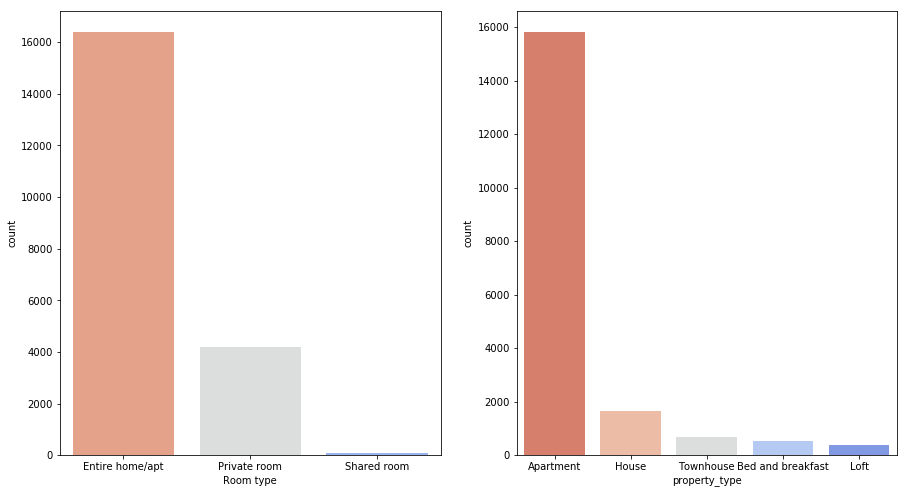

In [8]:
plt.figure(figsize = (15,18))
plt.subplot(2,2,1)
sns.countplot(x="room_type", data=airbnb, palette="coolwarm_r",
             order=airbnb.room_type.value_counts().index)
plt.xlabel('Room type')

plt.subplot(2,2,2)
sns.countplot(x="property_type", data=airbnb, palette="coolwarm_r",
             order=airbnb.property_type.value_counts().iloc[:5].index)


#plt.subplot(2,2,3)
#sns.countplot(x="state", data=airbnb, palette="coolwarm_r",
             #order=airbnb.state.value_counts().iloc[:5].index)


In [9]:
airbnb['room_type'].value_counts()

Entire home/apt    16402
Private room        4194
Shared room           81
Name: room_type, dtype: int64

In [10]:
#sns.countplot(x='property_type',data=airbnb)
airbnb['property_type'].unique()

array(['Apartment', 'Townhouse', 'Houseboat', 'Bed and breakfast',
       'Guest suite', 'Loft', 'Serviced apartment', 'Boutique hotel',
       'Guesthouse', 'Boat', 'Condominium', 'House', 'Villa', 'Camper/RV',
       'Other', 'Chalet', 'Nature lodge', 'Hut', 'Tiny house', 'Island',
       'Hotel', 'Cabin', 'Lighthouse', 'Barn', 'Bungalow', 'Hostel',
       'Cottage', 'Dome house', 'Earth house', 'Castle',
       'Casa particular (Cuba)', 'Aparthotel', 'Campsite', 'Tent', 'Yurt'], dtype=object)

In [11]:
airbnb['bed_type'].value_counts()
#airbnb['availability_365'].value_counts()


Real Bed         20498
Pull-out Sofa      119
Futon               40
Airbed              14
Couch                6
Name: bed_type, dtype: int64

In [12]:
#lt.figure(figsize = (15, 15))
#plt.style.use('seaborn-white')
#plt.subplot(221)
#sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group", data=airbnb)


In [13]:
#sns.scatterplot(x="latitude", y="longitude", data=airbnb)


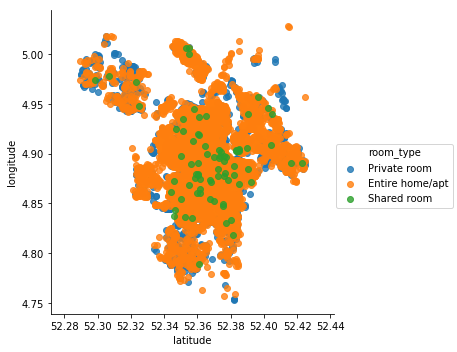

In [14]:
sns.lmplot(x="latitude", y="longitude",data=airbnb,fit_reg=False,hue='room_type');

In [15]:
#plt.figure(figsize=(12, 7))
#sns.boxplot(x='Pclass',y='Age',data=airbnb,palette='winter')

#airbnb['neighbourhood_cleansed '].value_counts()

In [16]:
#airbnb['street'].value_counts()

In [17]:
airbnb['availability_365'].head()

0     89
1    124
2     75
3     66
4    138
Name: availability_365, dtype: int64

In [18]:
airbnb['price'].head()

0     $59.00
1     $80.00
2    $125.00
3    $150.00
4     $75.00
Name: price, dtype: object

In [19]:
top_host=airbnb.host_id.value_counts().head(10)
top_host

65859990     208
1464510      105
76104209      79
113977564     69
107745142     48
84453740      37
14183886      29
140812051     27
7594884       26
84449589      25
Name: host_id, dtype: int64

In [20]:
airbnb.host_id.value_counts().max()

208

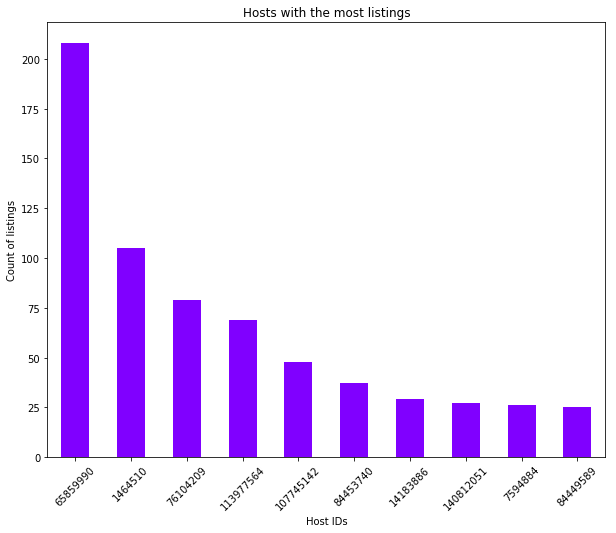

In [21]:
#sns.set(rc={'figure.figsize':(10,8)})
plt.figure(figsize = (10,8))
viz=top_host.plot(kind='bar',colormap='rainbow')
viz.set_title('Hosts with the most listings')
viz.set_ylabel('Count of listings')
viz.set_xlabel('Host IDs')
viz.set_xticklabels(viz.get_xticklabels(), rotation=45)

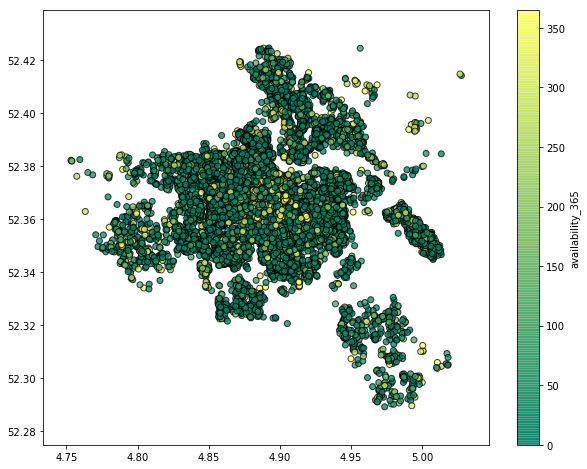

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(airbnb.longitude, airbnb.latitude, c=airbnb.availability_365, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')


In [23]:
#Removing $ sign from price column
airbnb['price']=airbnb['price'].apply(lambda x:x.split('$')[1])

In [24]:

airbnb['price'].head()


0     59.00
1     80.00
2    125.00
3    150.00
4     75.00
Name: price, dtype: object

In [25]:
airbnb_data=airbnb.loc[:,['room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365','number_of_reviews']]

In [26]:
airbnb_data.columns

Index(['room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews'],
      dtype='object')

In [27]:
airbnb_data.head()

,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews
0,Private room,59.00,3,1,89,267
1,Private room,80.00,1,2,124,283
2,Entire home/apt,125.00,14,2,75,3
3,Private room,150.00,2,1,66,195
4,Private room,75.00,2,3,138,283


In [28]:
# One hot encoding

In [29]:
room_type = pd.get_dummies(airbnb_data['room_type'])

In [30]:
airbnb_data = pd.concat([airbnb_data,room_type],axis=1)

In [31]:
airbnb_data.drop('room_type',axis=1,inplace=True)

In [45]:
#airbnb_data['price'].astype(str)
#airbnb_data['price']=airbnb_data['price'].str.replace(',','')
airbnb_data['price']=pd.to_numeric(airbnb_data['price'])
#print(airbnb_data[airbnb_data['price']=="8,000.00"])

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(airbnb_data.drop('price',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
scaled_features = scaler.transform(airbnb_data.drop('price',axis=1))

In [50]:
X=pd.DataFrame(scaled_features)
X=X.rename(index=str, columns={0:'minimum_nights',1:'calculated_host_listings_count',2:'availability_365',
                            3:'number_of_reviews',4:'Entire home/apt',5:'Private room',6:'Shared room'})
X.head()

,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,Entire home/apt,Private room,Shared room
0,-0.029251,-0.171530,0.350756,5.012689,-1.958756,1.982458,-0.062712
1,-0.136260,-0.127829,0.702564,5.341781,-1.958756,1.982458,-0.062712
2,0.559301,-0.127829,0.210033,-0.417337,0.510528,-0.504424,-0.062712
3,-0.082755,-0.171530,0.119568,3.531773,-1.958756,1.982458,-0.062712
4,-0.082755,-0.084129,0.843287,5.341781,-1.958756,1.982458,-0.062712


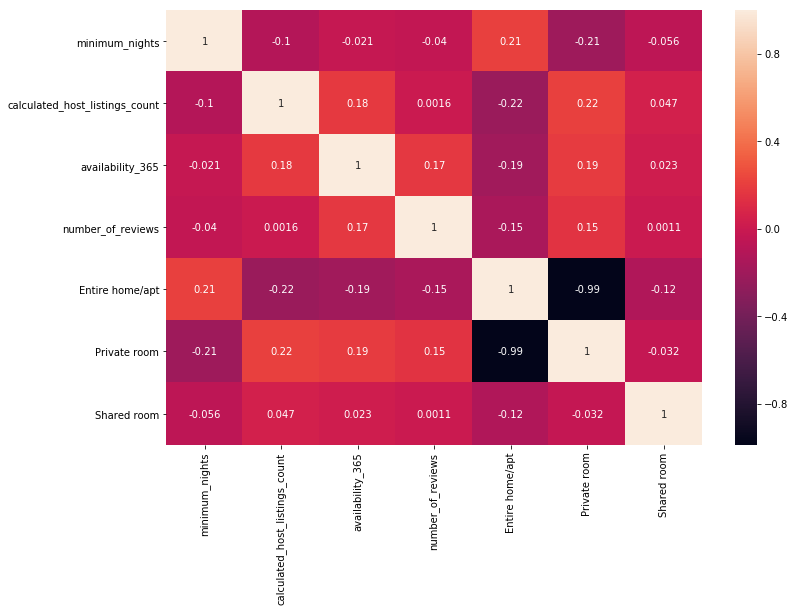

In [51]:
#Correlation between different variables
corr = X.corr(method='kendall')
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
y=airbnb_data['price']


In [54]:
#X=airbnb_data.iloc[:,[2,3,4,5]]
#X.head()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)
#X_train.head()


In [56]:
#X_train.head()
type(X_train)
y_train.dtype
#y_train.head()

dtype('float64')

In [58]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.044216124840486648

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 3 0]
 [0 0 0 ..., 0 0 0]]


             precision    recall  f1-score   support

   1,000.00       0.33      0.33      0.33         3
   1,025.00       0.00      0.00      0.00         1
   1,195.00       0.00      0.00      0.00         1
   1,200.00       0.00      0.00      0.00         1
   1,250.00       0.00      0.00      0.00         0
   1,285.00       0.00      0.00      0.00         1
   1,500.00       0.00      0.00      0.00         1
   1,600.00       0.00      0.00      0.00         0
     100.00       0.08      0.09      0.08       316
     101.00       0.00      0.00      0.00         8
     102.00       0.00      0.00      0.00         7
     103.00       0.00      0.00      0.00         4
     104.00       0.00      0.00      0.00         6
     105.00       0.00      0.00      0.00        67
     106.00       0.00      0.00      0.00         4
     107.00       0.00      0.00      0.00         5
     108.00       0.00      0.00      0.00        12
     109.00       0.03      0.03      0.03   

/Users/gaurimore/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gaurimore/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,Entire home/apt,Private room,Shared room
0,3,1,89,267,0,1,0
1,1,2,124,283,0,1,0
2,14,2,75,3,1,0,0
3,2,1,66,195,0,1,0
4,2,3,138,283,0,1,0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')